In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sspspace import SSPSpace, HexagonalSSPSpace, RandomSSPSpace
from rsspspace import RSSPSpace

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


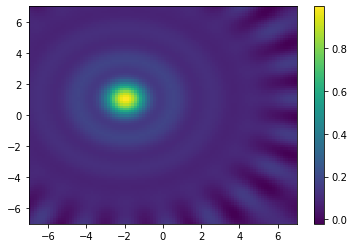

In [21]:
n_scales=14
n_rotates=4
scales = np.linspace(0.01,3.1,n_scales)
sspspace1 = HexagonalSSPSpace(domain_dim=2,n_rotates=n_rotates,n_scales=n_scales, scale_min=0.01, scale_max=3.1,
        domain_bounds=7*np.array([[-1,1],[-1,1]]), length_scale=1)

ssp1 = sspspace1.encode(np.atleast_2d(np.array([-2,1])))

im=sspspace1.similarity_plot(ssp1)
plt.colorbar(im)

In [7]:
scales

array([0.01      , 0.24769231, 0.48538462, 0.72307692, 0.96076923,
       1.19846154, 1.43615385, 1.67384615, 1.91153846, 2.14923077,
       2.38692308, 2.62461538, 2.86230769, 3.1       ])

In [32]:
scalemask1 = np.zeros(n_scales)
scalemask1[:4]=1
scalemask1*scales

array([0.01      , 0.24769231, 0.48538462, 0.72307692, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [39]:
maskhalf = np.tile(np.repeat(scalemask1,3),n_rotates)
mask = np.concatenate([maskhalf, np.flip(maskhalf)])
mask.shape

(336,)

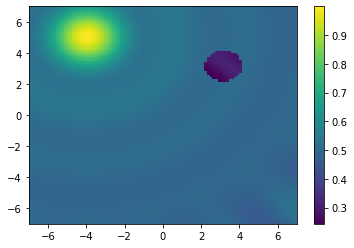

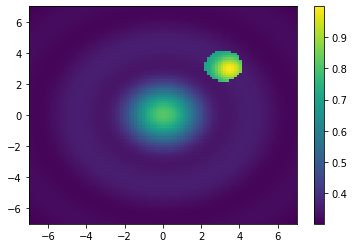

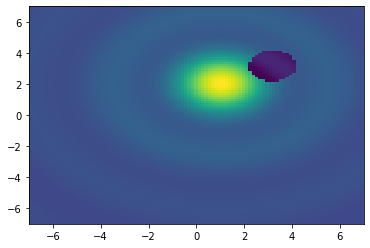

In [70]:
def make_mask(scale_mask):
    maskhalf = np.tile(np.repeat(scale_mask,3),n_rotates)
    mask= np.concatenate([[1], maskhalf, np.flip(maskhalf)]).reshape(-1,1)
    #mask[mask==0]=0.1
    return mask

scalemask1 = np.zeros(n_scales)
scalemask1[:3]=1
mask1 = make_mask(scalemask1)
scalemask2 = np.zeros(n_scales)
scalemask2[6:]=1
mask2 = make_mask(scalemask2)

def phase_matrix_fun(x):
    dist = np.sqrt(np.sum((x - np.pi)**2))
    if dist < 1:
        return mask1*sspspace1.phase_matrix
    else:
        return mask2*sspspace1.phase_matrix

rsspspace = RSSPSpace(domain_dim=2, ssp_dim=sspspace1.ssp_dim, 
        domain_bounds=7*np.array([[-1,1],[-1,1]]),
        phase_matrix = phase_matrix_fun)

ssp1 = rsspspace.encode(np.atleast_2d(np.array([-4,5])))

im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

ssp2 = rsspspace.encode(np.atleast_2d(np.array([np.pi+0.3,np.pi-0.2])))
im=rsspspace.similarity_plot(ssp2)
plt.colorbar(im)

ssp1 = rsspspace.encode(np.atleast_2d(np.array([1,2])))

rsspspace.similarity_plot(ssp1)

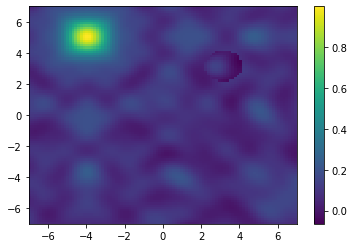

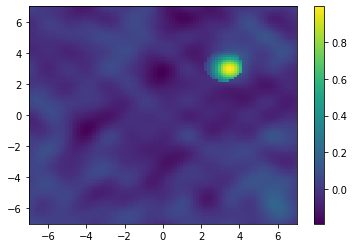

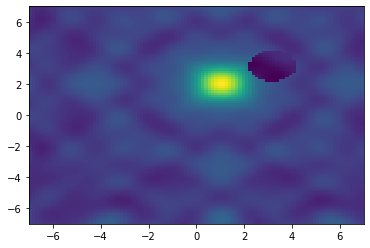

In [68]:
def make_mask(scale_mask):
    maskhalf = np.tile(np.repeat(scale_mask,3),n_rotates)
    mask= np.concatenate([[1], maskhalf, np.flip(maskhalf)]).reshape(-1,1)
    mask[mask==0]=-100
    return mask

scalemask1 = np.zeros(n_scales)
scalemask1[:3]=1
mask1 = make_mask(scalemask1)
scalemask2 = np.zeros(n_scales)
scalemask2[6:]=1
mask2 = make_mask(scalemask2)

def phase_matrix_fun(x):
    dist = np.sqrt(np.sum((x - np.pi)**2))
    if dist < 1:
        return mask1*sspspace1.phase_matrix
    else:
        return mask2*sspspace1.phase_matrix
    
def length_scale_fun(x):
    length_scale = 10*np.ones(x.shape)
    dist = np.sqrt(np.sum((x - np.pi)**2,axis=1))
    length_scale[dist < 1 ,:] = 0.5 #(dist[dist<1] + 0.5).reshape(-1,1)
    return length_scale

rsspspace = RSSPSpace(domain_dim=2, ssp_dim=sspspace1.ssp_dim, 
        domain_bounds=7*np.array([[-1,1],[-1,1]]),
        phase_matrix = phase_matrix_fun)

ssp1 = rsspspace.encode(np.atleast_2d(np.array([-4,5])))

im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

ssp2 = rsspspace.encode(np.atleast_2d(np.array([np.pi+0.3,np.pi-0.2])))
im=rsspspace.similarity_plot(ssp2)
plt.colorbar(im)

ssp1 = rsspspace.encode(np.atleast_2d(np.array([1,2])))

rsspspace.similarity_plot(ssp1)

In [ ]:
def make_mask(scale_mask):
    maskhalf = np.tile(np.repeat(scale_mask,3),n_rotates)
    mask= np.concatenate([[1], maskhalf, np.flip(maskhalf)]).reshape(-1,1)
    #mask[mask==0]=0.1
    return mask

scalemask1 = np.zeros(n_scales)
scalemask1[:3]=1
mask1 = make_mask(scalemask1)
scalemask2 = np.zeros(n_scales)
scalemask2[6:]=1
mask2 = make_mask(scalemask2)

def axis_matrix_fun(x):
    dist = np.sqrt(np.sum((x - np.pi)**2))
    if dist < 1:
        return mask1*sspspace1.phase_matrix
    else:
        return mask2*sspspace1.phase_matrix

rsspspace = RSSPSpace(domain_dim=2, ssp_dim=sspspace1.ssp_dim, 
        domain_bounds=7*np.array([[-1,1],[-1,1]]),
        axis_matrix = axis_matrix_fun)

ssp1 = rsspspace.encode(np.atleast_2d(np.array([-4,5])))

im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

ssp2 = rsspspace.encode(np.atleast_2d(np.array([np.pi+0.3,np.pi-0.2])))
im=rsspspace.similarity_plot(ssp2)
plt.colorbar(im)

ssp1 = rsspspace.encode(np.atleast_2d(np.array([1,2])))

rsspspace.similarity_plot(ssp1)

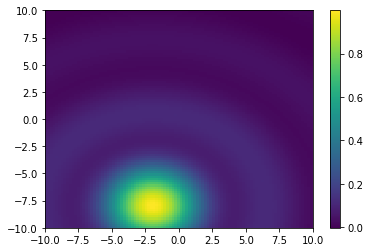

In [6]:
sspspace1 = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, scale_min=0.1, scale_max=0.9,
        domain_bounds=10*np.array([[-1,1],[-1,1]]), length_scale=1)

ssp1 = sspspace1.encode(np.atleast_2d(np.array([-2,-8])))

im=sspspace1.similarity_plot(ssp1)
plt.colorbar(im)

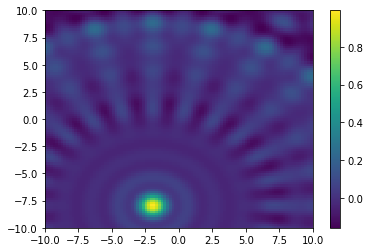

In [9]:
sspspace1 = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, scale_min=0.5, scale_max=3,
        domain_bounds=10*np.array([[-1,1],[-1,1]]), length_scale=1)

ssp1 = sspspace1.encode(np.atleast_2d(np.array([-2,-8])))

im=sspspace1.similarity_plot(ssp1)
plt.colorbar(im)